# Lab 2
## Triangle containment phase transition in the Erdős-Rényi random graph G(*n*, _M_).
## (continuation)

### **G(n, M) [Erdős-Rényi](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model) random graph:**

* __G(n, M)__: a graph is chosen uniformly at random from the collection of all graphs which have _n_ nodes and *M* edges. <br>
    In this lab we will generate G(n, M) random graphs by adding M random edges to an empty graph. 

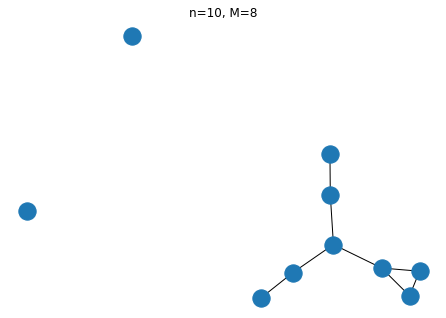

In [10]:
import networkx as nx
nx.draw(nx.gnm_random_graph(10, 8))
plt.title('n=10, M=8')
plt.show()

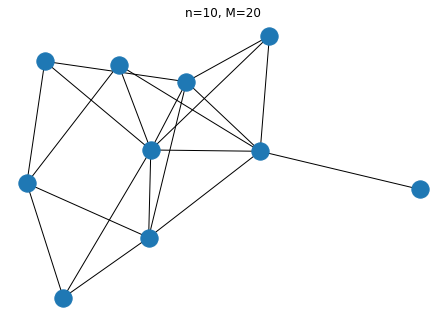

In [11]:
nx.draw(nx.gnm_random_graph(10, 20))
plt.title('n=10, M=20')
plt.show()

### What we covered in the last class:

* We implemented a function that generates G(n, M) Erdős-Rényi random graphs
* Our goal was to investigate when the first triangle appears in G(n, M). To this end our approach was the following:
    1. Start with an empty graph on n nodes
    2. Add a random edge to the graph (which is neither a [loop](https://en.wikipedia.org/wiki/Loop_(graph_theory)) nor a [parallel](https://en.wikipedia.org/wiki/Multiple_edges) edge)
    3. Check wether the newly added edge creates a triangle in G:
        * if it creates a triangle, then the function returns the number of edges of the graph
        * otherwise: go back to step 2.

### **Goal of this lab:**

The goal of the this lab is to further investigate when the first triangle appears in G(n, M). Our appoach from the first lab: we start with an empty graph G, and we keep adding random edges to G until a triangle appears. We repeat this procedure several times and note when the first triangle appeared (with the help of the ```first_triangle()``` function. See __Exercise 3__ of the first lab).

__The goal of this lab__ is to study the distribution of the number of (random) edges required to form a triangle in G(n, M), namely to study the distribution of the output of the ```first_triangle()``` function. <br>
The __second goal__ of this lab is to learn how can we fit curves to data, and how can we evaluate the goodness-of-fit of the curves.

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter
import pandas as pd
from scipy.optimize import curve_fit 

# Functions from the first lab:

We are going to use the ```has_triangle``` and the ```first_triangle``` functions from the previous class

## Solution for __Exercise 2__ of Lab 1
The ```has_triangle``` function has two input parameters: a graph G and an edge (u, v). The function returns a boolean variable, which indicades whether the (u, v) edge is contained in a triangle in G or not. 
We will apply this function to the newly added random edges, hence we can assume that (u, v) is part of the graph, we don't have to check it. 

Some useful built-in functions:
* [Graph.neighbors(v)](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.neighbors.html)
* [Graph.has_edge(u,v)](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.has_edge.html)

You can test your function for example with [nx.complete_graph](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.classic.complete_graph.html), and [nx.empty_graph](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.classic.empty_graph.html#networkx.generators.classic.empty_graph), and [nx.karate_club_graph()](). If you would like to see the name of the nodes then add ```with_labels=True``` to the argument of ```nx.draw()```, e.g.: ```nx.draw(graph, with_labels=True)```, or alternatively the [nx.draw_networkx](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx) function shows the name of the nodes by default.

In [5]:
def has_triangle(graph, edge): #edge is part of the graph
    
    # It is enough to check the neighbors of an endpoint of the edge.
    for node in graph.neighbors(edge[0]):
        
        # If a neighbor of u is also connected to v then (u, v) is in a triangle. 
        if graph.has_edge(node, edge[1]):
            return True

    return False

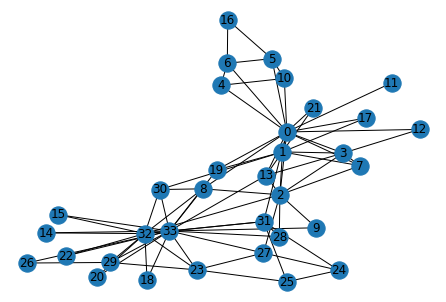

In [6]:
nx.draw(nx.karate_club_graph(), with_labels=True)
plt.show() 

In [18]:
has_triangle(nx.karate_club_graph(), (5, 16))

True

In [20]:
has_triangle(nx.karate_club_graph(), (0, 11))

False

## Solution for __Exercise 3__ of Lab 1

The ```first_triangle``` has one input parameter: the number of nodes. <br>
The function starts with an empty graph, and then it keeps adding random edges to the graph until the newly added edge forms a triangle. When it happens, then the function returns the number of edges of the created graph, i.e. the number of edges required to form a triangle in G(n, M). 

In [7]:
def first_triangle(graph_size=100):
    
    graph = nx.empty_graph(graph_size)
    possible_edges = set(nx.complete_graph(graph_size).edges)
    number_of_edges = 0
    graph_has_triangle = False
 
    # While the graph is triangle-free:
    while not graph_has_triangle:
        
        # Add a random edge to the graph
        random_edge = random.choice(list(possible_edges))
        possible_edges -= {random_edge}
        graph.add_edge(*random_edge)
        number_of_edges +=1 
        
        # Check whether the random_edge forms a triangle
        graph_has_triangle = has_triangle(graph, random_edge)
        
    return number_of_edges

In [11]:
first_triangle()

73

In [9]:
first_triangle()

35

__The output of the `first triangle` function, i.e. number of randomly added edges needed to create a triangle, is a random number/variable.__ 
### Let's investigate its distribution!

### __NumPy array__ ([numpy.org](https://numpy.org/))
#### __numpy array vs python list__

* A numpy array is a grid of values.
* The difference between a numpy array and a list is __performance__. Numpy data structures perform better in:
    * Size - Numpy data structures require less space
    * Performance - they are faster than lists
    * Functionality - SciPy and NumPy have optimized functions such as linear algebra operations built in.

Summation and multiplication of numpy arrays work differently than with lists. If $x$ and $y$ are NumPy arrays of the same dimension (n), we can perform the following operations:
* $x+y$
* $2 \cdot x$
* $x + 2 = (x_1+2, \ldots, x_n+2)$
* $f(x) = (f(x_1), f(x_2), \ldots, f(x_n))$
* $\frac{x}{y} = (\frac{x_1}{y_1}, \ldots, \frac{x_n}{y_n})$

In [12]:
x = np.array([1,2,2,3])

In [13]:
y = np.array([1,1,4,0.5])

In [14]:
x + y

array([2. , 3. , 6. , 3.5])

In [15]:
2 * x

array([2, 4, 4, 6])

In [16]:
x + 2

array([3, 4, 4, 5])

In [33]:
x ** 2

array([1, 4, 4, 9], dtype=int32)

In [34]:
np.power(x, 2)

array([1, 4, 4, 9], dtype=int32)

In [12]:
np.power(x, y)

array([ 1.        ,  2.        , 16.        ,  1.73205081])

In [17]:
x.sum()

8

In [18]:
y.mean()

1.625

In [19]:
x.std()

0.7071067811865476

In [42]:
(y-y.mean())/y.std()

array([-0.45083482, -0.45083482,  1.71317231, -0.81150267])

In [20]:
x/y

array([1. , 2. , 0.5, 6. ])

### __These operations are much slover, and more complicated with Python lists__ 

Examples:

In [21]:
[x[i] + y[i] for i in range(len(x))]

[2.0, 3.0, 6.0, 3.5]

In [22]:
[x_i + 2 for x_i in x]

[3, 4, 4, 5]

## __Exercise 1__ 
Investigate the distribution of the number of edges required to form a triangle, i.e. the distribution of the output of the ```first_triangle``` function:
* Create a list of 1500 independent trials with the `first_triangle` function (and save it in a variable). Set the number of nodes to 100.
* Plot the histogram of the trials. Useful function: [plt.hist(x)](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html). Try it with different bin sizes (`bins` parameter). 
* Plot the frequencies against the required number of edges on a [scatter plot](https://en.wikipedia.org/wiki/Scatter_plot). Useful functions: [Counter( )](https://docs.python.org/2/library/collections.html#collections.Counter) for the frequencies, and <br> [plt.scatter](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html) for the scatter plot.
* Plot the [estimated probability density](https://en.wikipedia.org/wiki/Kernel_density_estimation) function. See the example [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.kde.html).
* Calculate the mean and the standard deviation of the sample. (Use numpy functions)

__This should take you about 10-15 minutes!__


# What happens if we increase the number of nodes _n_?

## __Exercise 2__ 

Plot the __estimated probability density function__ for _n = 50, 100, 200, 400_ (It may take a few minutes to calculate for $n=400$).  Reduce the sample size to 100. 


You can plot the four curves in one figure by writing the expressions under each other in a cell. 

### What can you observe? How the mean value and the standarad deviation change as we increase the number of nodes?

#### __This should take you about 6-8 minutes__

## __Exercise 3__ 

Goal of this exercise is to investigate, what the relation is between the __mean value__ and the __number of nodes__, moreover what is the relation between the standard deviation and the number of nodes.
1. Write a function, called `mean_and_std`, which has two inputs: a list of graph sizes (number of nodes) and an integer denoting the number of independent trials (`sample_size`). The function should return the mean and standard deviation of the independent trials for each graph size.
2. With the help of this function plot the mean of the samples against the number of nodes on a scatter plot. <br> Set the list of graph sizes for example to `30, 50, 70,...,150` (you can use the `range` function).
3. Plot the size of the graphs against the mean values on a scatterplot. (The x-axis should show the number of nodes, and the y-axis should show the mean number of edges needed to from a triangle)
4. Plot the graph sizes against the standard deviations on a scatterplot.

##### You can add labels to the axes with the `plt.xlabel`, and `plt.ylabel` functions.

#### __This should take you about 15 minutes__

## How can we be sure, that there is a linear relationship in our data?

![](https://math.bme.hu/~marcessz/notebooks/regression.jpg)

# __Regression analysis__ 

### Parametric (1D) regression 

### Variables:
* $x$: independent/explanatory/input variable (e.g. the number of nodes)
* $y$: dependent/target/output variable (e.g. the mean number of edges required to form a triangle) <br>
[Dependent and independent variables](https://en.wikipedia.org/wiki/Dependent_and_independent_variables)

### Assumption:
There is a relationship between $x$ and $y$ and this relationship is described by function $f$
* ### $y = f(x) + \varepsilon$, 
    * where $\varepsilon$ is the noise; usually assumed to be standard normally distributed and independent of $x$
    * and $f$ is parameterized by $\beta = (\beta_1,\ldots,\beta_k)$. (e.g. $f(x) =a\cdot x + b $ or $f(x) = a\cdot x^b$)

### Goal:
Given a dataset of input-output pairs: $\{(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)\}$, the goal of parametric regression is to find the parameter vector $\beta$ which minimizes the distance between $y=(y_1,\ldots,y_n)$ and its estimation $\hat{y} = f(x) = (f(x_1), \ldots, f(x_n))$.<br> 

![](https://math.bme.hu/~marcessz/notebooks/linearregression.png)

### For the regression, we will use the [scipy's curve_fit function](https://www.geeksforgeeks.org/scipy-curve-fitting/)

Functions that we will use:
* [np.linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)
* [np.exp](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html)
* [np.random.normal](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html)
* [np.power](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.power.html)
* [np.sum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html)
* [np.zeros_like](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html)

#### Now we are going to generate our own dataset, and then use the ```curve_fit``` function to fit exponential and linear curves to our data.

In [70]:
# numpy.linspace with the given arguments 
# produce an array of 41 numbers between 0 
# and 1, both inclusive
x = np.linspace(0, 1, num=41)

In [66]:
x

array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
       0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
       0.9  , 0.925, 0.95 , 0.975, 1.   ])

### $y = 3.5 \cdot e^{1.3\cdot x} + noise$ 

In [89]:
y = 3.5 * np.exp(1.3 * x) + np.random.normal(size = 41) 

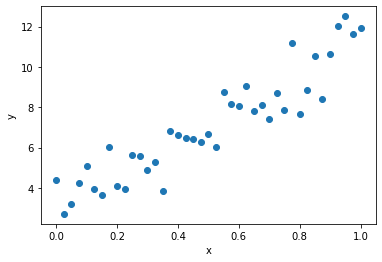

In [90]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [91]:
# Test function with coefficients as parameters.
# Test function = what we would like to fit to the data
def test_exp(x, a, b): 
    return a * np.exp(b * x)

In [92]:
# curve_fit() function takes the test-function 
# x-data and y-data as argument and returns  
# the coefficients a and b in param and 
# the estimated covariance of param in param_cov 
param, param_cov = curve_fit(test_exp, x, y) 

In [93]:
param

array([3.73424226, 1.16924864])

In [94]:
#points of the fitted curve:
fitted_exp_curve = param[0] * np.exp(param[1] * x)

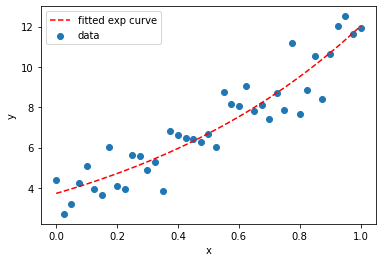

In [95]:
plt.scatter(x, y, label='data')
plt.plot(x, fitted_exp_curve, '--', color='red', label='fitted exp curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## What if do not know the origin of the data, and we believe that our data is linear? 

In [96]:
def test_lin(x, a, b):
    return a*x + b

In [97]:
param_lin, param_lin_cov = curve_fit(test_lin, x, y) 

In [98]:
param_lin

array([8.16652949, 3.02301717])

In [99]:
#points of the fitted line:
fitted_line = param_lin[0] * x+param_lin[1]

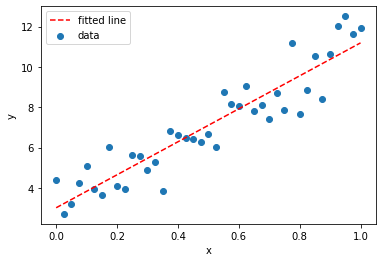

In [101]:
plt.scatter(x, y, label='data')
plt.plot(x, fitted_line, '--', color='red', label='fitted line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### __We can fit a line to any kind of data. With the fitted line, our exponential data looks linear.__ 

## __Exercise 4__ 

Repeat the previous analysis, but now let the $y$ be a linear function of $x$ as follows:
#### $y = 9x + 2.5 + noise$

1. Generate the linear data: $y\_lin = 9x + 2.5 + noise$, and visualize it on a scatter plot. 
2. Fit both the exponential and the linear functions to the linear data
3. Plot the data and the fitted curves, similarily as we did before.

#### __This should take you about 10 minutes__

## __How to evaluate goodness of fit of the models/functions?__

* #### Sum of Squared Errors ([SSE](https://en.wikipedia.org/wiki/Residual_sum_of_squares)) 
##### also known as Residual Sum of Squares (RSS), and Sum of Squared Residuals (SSR) 
* #### $R^2$ ([R squared](https://en.wikipedia.org/wiki/Coefficient_of_determination))
* #### Adjusted $R^2$ ([for multiple regression](https://en.wikipedia.org/wiki/Coefficient_of_determination#Adjusted_R2))
* #### Residual analysis (described [here](https://stattrek.com/regression/residual-analysis.aspx) and [here](https://opexresources.com/analysis-residuals-explained/))
#### Useful page: [regression metrics](https://dziganto.github.io/data%20science/linear%20regression/machine%20learning/python/Linear-Regression-101-Metrics/)

### $ SSE = \sum_{i=1}^n (y_i - f(x_i))^2$
Residuals: $r_i = y_i - f(x_i)$

## First case: $y = 3.5  e^{1.3  x} + noise$

Calculate the SSE of the exponential function:

In [107]:
# f(x_i):
fitted_exp_curve = param[0]*np.exp(param[1]*x)

In [108]:
sse_exp = np.sum(np.power(y - fitted_exp_curve, 2.0))

#### SSE of the fitted exponential function:

In [109]:
sse_exp

35.63449026559874

Calculate the SSE of the linear regression:

In [110]:
# f(x_i):
fitted_line = param_lin[0]*x+param_lin[1]

In [111]:
sse_lin = np.sum(np.power(y - fitted_line, 2.0))

#### SSE of the fitted line:

In [112]:
sse_lin

39.699386581540956

In [118]:
sse_exp/sse_lin

0.8976080824928345

#### __The SSE of the exponential regression is smaller than the SSE of the linear regression $\Longrightarrow$ the exponential model fits better the data__

## __Exercise 5__

Calculate the SSE of the exponential and the linear models fitted on the linear data, i.e. when $y\_lin = 9x + 2.5 + noise$. Which function fits better the linear data?

## Second case: $y = 9x + 2.5 + noise$

## $R^2$ (R-squared)
#### $R^2$ is the proportion of the variance in variable $y$ that is predictable/explainable from variable $x$. 
[source](https://en.wikipedia.org/wiki/Coefficient_of_determination)

![r-squared](https://upload.wikimedia.org/wikipedia/commons/8/86/Coefficient_of_Determination.svg)<br>
![formula](https://wikimedia.org/api/rest_v1/media/math/render/svg/6b863cb70dd04b45984983cb6ed00801d5eddc94)

The better the linear regression (on the right) fits the data in comparison to the simple average (on the left graph), the closer the value of $R^2$ is to 1. The areas of the blue squares represent the squared residuals with respect to the linear regression. The areas of the red squares represent the squared residuals with respect to the average value.

### Total Sum of Squares ([TSS or SST]((https://en.wikipedia.org/wiki/Total_sum_of_squares))) 

### $TSS= \sum_{i=1}^n (y_i - \bar{y})^2$, where $\bar{y} = \frac{1}{n}\sum_{i=1}^n y_i$

### $$R^2 = 1 - \frac{SSE}{TSS} = 1 - \frac{\sum_{i=1}^n (y_i - f(x_i))^2}{ \sum_{i=1}^n (y_i - \bar{y})^2}$$

## __Exercise 6__ 

1. Write a function that calculates the $R^2$. Its inputs should be the vectors of $\hat{y} = f(x)$ and $y$.
2. Calculate the $R^2$ of the fitted (exponential and linear) functions on the exponential data.
3. Calculate the $R^2$ of the fitted (exponential and linear) functions on the linear data.

Based on the $R^2$ values, which model fits better these data?

# __Residual analysis__

An alternative way to investigate the goodness-of-fit of your function 

### Recall our assumption:

There is a relationship between $x$ and $y$ and this relationship is described by function $f$
* ### $y = f(x) + \varepsilon$, 
    * where $\varepsilon$  is the __noise__; usually assumed to be __standard normally distributed__ and independent of $x$
    * and $f$ is parametrized by $\beta = (\beta_1,\ldots,\beta_k)$. (e.g. $f(x) = \beta_0 + \beta_1 x $ )

### The sum of squares of residuals is the sum of squares of estimates of the random noise $\varepsilon_i$; that is
#### $$SSE = \sum_{i=1}^n (\varepsilon_i)^2 = \sum_{i=1}^n (y_i - \hat{y}_i)^2 = \sum_{i=1}^n (y_i - f(x_i))^2 $$

### Residual = Observed value - Predicted value = y - f(x). 
### Based on our assumption, if our model fits the data well, then the residuals should be standard normally distributed and independent of $x$.

![https://opexresources.com/wp-content/uploads/2017/03/good-bad-correlations-e1488988577870.jpg](https://opexresources.com/wp-content/uploads/2017/03/good-bad-correlations-e1488988577870.jpg)

## When your model is appropriate for the data:

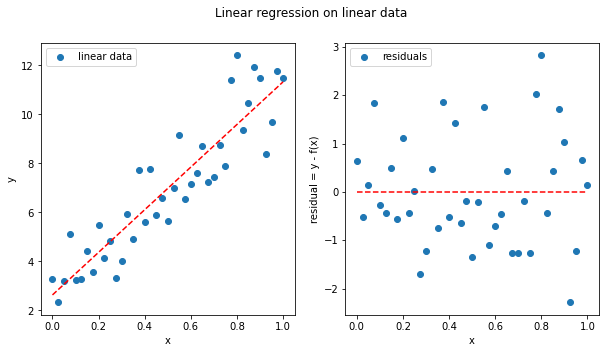

In [124]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Linear regression on linear data')
ax1.scatter(x, y_lin, label='linear data')
ax1.plot(x, fitted_line_for_lin, '--', color='red')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()

ax2.scatter(x, y_lin - fitted_line_for_lin, label='residuals')
ax2.plot(x, np.zeros_like(x), '--', color='red')
ax2.set_xlabel('x')
ax2.set_ylabel('residual = y - f(x)')
ax2.legend()
plt.show()

## When your model is <span style='color:red'>__not__</span> appropriate for the data:

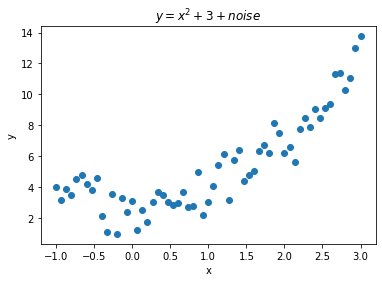

In [125]:
x_quad = np.linspace(-1,3,61)
y_quad = np.power(x_quad, 2) +3 + np.random.normal(size = 61) 
plt.scatter(x_quad, y_quad)
plt.xlabel('x')
plt.ylabel('y')
plt.title('$y = x^2 + 3 + noise$')
plt.show()

In [126]:
# Fit lin
parameters, cov_parameters = curve_fit(test_lin, x_quad, y_quad) 
# points of the linear regression:
lin_reg_for_quad = parameters[0]*x_quad + parameters[1]

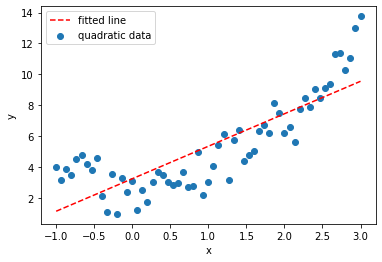

In [127]:
plt.scatter(x_quad, y_quad, label='quadratic data')
plt.plot(x_quad, lin_reg_for_quad, '--', color='red', label='fitted line')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Calculate and plot the residuals 

In [128]:
residuals = y_quad - lin_reg_for_quad

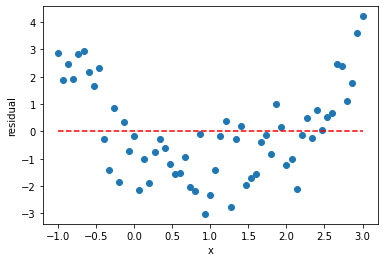

In [129]:
plt.scatter(x_quad, residuals)
plt.plot(x_quad, np.zeros_like(x_quad), '--', color='red')
plt.xlabel('x')
plt.ylabel('residual')
plt.show()

### The patterns of the residuals is non-random (U-shape) $\Longrightarrow$  suggesting a better fit for a non-linear model.